In [1]:
import matplotlib.pyplot as plt
import math

In [11]:
def read_csv_file(path: str):
    """Read csv file (without using any libraries)"""
    feature = []
    label = []
    count = 0
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            if count == 0:
                count += 1
                continue 
            
            xy = line.splitlines()
            print(xy)
            x1, x2, y = xy[0].split(",")
            print(x1)
            print(x2)
            print(y)
            feature.append([float(x1), float(x2)])  
            label.append(float(y))    
            
    return feature, label  

data = read_csv_file('loan.csv')
print(data)

['3,4,1']
3
4
1
['2.5,4,1']
2.5
4
1
['1,4,0']
1
4
0
['2.5,5,1']
2.5
5
1
['2,5,1']
2
5
1
['1.5,5,0']
1.5
5
0
['0.5,5,0']
0.5
5
0
['1.75,6,1']
1.75
6
1
['0.25,6,0']
0.25
6
0
['1,7,1']
1
7
1
['0.25,7,0']
0.25
7
0
['0.20,7,0']
0.20
7
0
['0.15,7,0']
0.15
7
0
['2,8,1']
2
8
1
['1,8,0']
1
8
0
['0.15,8,0']
0.15
8
0
['0.10,8,0']
0.10
8
0
['0.5,9,1']
0.5
9
1
['1,10,1']
1
10
1
([[3.0, 4.0], [2.5, 4.0], [1.0, 4.0], [2.5, 5.0], [2.0, 5.0], [1.5, 5.0], [0.5, 5.0], [1.75, 6.0], [0.25, 6.0], [1.0, 7.0], [0.25, 7.0], [0.2, 7.0], [0.15, 7.0], [2.0, 8.0], [1.0, 8.0], [0.15, 8.0], [0.1, 8.0], [0.5, 9.0], [1.0, 10.0]], [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0])


## Binary Cross Entropy

In [3]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def logistic_regression(x_data, y_data, lr=0.01, iterations=1000):
    w0, w1, w2 = 0.0, 0.0, 0.0
    loss_history = []

    for step in range(iterations):
        total_loss = 0.0
        dw0, dw1, dw2 = 0.0, 0.0, 0.0

        for x, y in zip(x_data, y_data):
            x0, x1 = x
            z = w1 * x0 + w2 * x1 + w0
            pred = sigmoid(z)
            error = pred - y

            dw0 += error
            dw1 += error * x0
            dw2 += error * x1

            eps = 1e-15
            total_loss += - (y * math.log(pred + eps) + (1 - y) * math.log(1 - pred + eps))

        n = len(x_data)
        w0 -= lr * dw0 / n
        w1 -= lr * dw1 / n
        w2 -= lr * dw2 / n

        avg_loss = total_loss / n
        loss_history.append(avg_loss)

        print(f"Step {step}: Loss = {avg_loss:.6f}, Weights = [{w0:.5f}, {w1:.5f}, {w2:.5f}]")

        if step > 0 and abs(loss_history[-2] - avg_loss) < 1e-6:
            break

    return loss_history, w0, w1, w2


In [4]:
x = data[0]
y = data[1]
losses,w0, w1, w2 = logistic_regression(x, y, lr=0.1)


Step 0: Loss = 0.693147, Weights = [-0.00263, 0.02934, -0.01842]
Step 1: Loss = 0.682391, Weights = [-0.00304, 0.06019, -0.02048]
Step 2: Loss = 0.672996, Weights = [-0.00398, 0.08978, -0.02512]
Step 3: Loss = 0.664144, Weights = [-0.00497, 0.11861, -0.02917]
Step 4: Loss = 0.655780, Weights = [-0.00609, 0.14661, -0.03316]
Step 5: Loss = 0.647875, Weights = [-0.00733, 0.17384, -0.03700]
Step 6: Loss = 0.640402, Weights = [-0.00867, 0.20032, -0.04072]
Step 7: Loss = 0.633333, Weights = [-0.01013, 0.22607, -0.04431]
Step 8: Loss = 0.626643, Weights = [-0.01168, 0.25112, -0.04777]
Step 9: Loss = 0.620309, Weights = [-0.01334, 0.27550, -0.05112]
Step 10: Loss = 0.614309, Weights = [-0.01509, 0.29922, -0.05435]
Step 11: Loss = 0.608622, Weights = [-0.01693, 0.32232, -0.05747]
Step 12: Loss = 0.603228, Weights = [-0.01885, 0.34481, -0.06048]
Step 13: Loss = 0.598109, Weights = [-0.02087, 0.36671, -0.06339]
Step 14: Loss = 0.593247, Weights = [-0.02296, 0.38806, -0.06620]
Step 15: Loss = 0.58

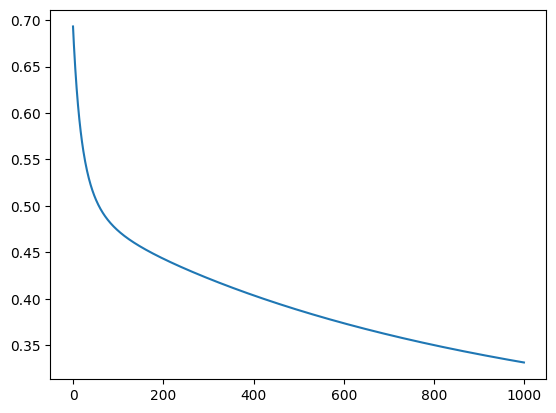

In [5]:
plt.plot(losses)

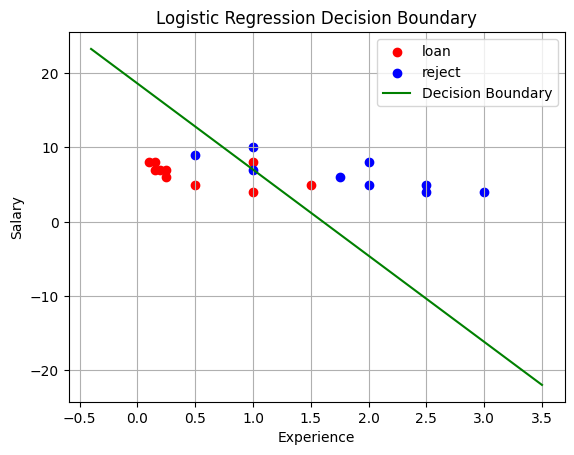

In [ ]:

def plot_decision_boundary(x_data, y_data, w0, w1, w2):

    x0_class0 = [x[0] for x, y in zip(x_data, y_data) if y == 0]
    x1_class0 = [x[1] for x, y in zip(x_data, y_data) if y == 0]
    x0_class1 = [x[0] for x, y in zip(x_data, y_data) if y == 1]
    x1_class1 = [x[1] for x, y in zip(x_data, y_data) if y == 1]

    plt.scatter(x0_class0, x1_class0, color='red', label='loan')
    plt.scatter(x0_class1, x1_class1, color='blue', label='reject')

    x_range = [min(x[0] for x in x_data) - 0.5, max(x[0] for x in x_data) + 0.5]
    y_boundary = [-(w1 * x + w0) / w2 for x in x_range]

    plt.plot(x_range, y_boundary, color='green', label='Decision Boundary')

    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.grid(True)
    plt.title('Logistic Regression Decision Boundary')
    plt.show()
plot_decision_boundary(x, y, w0, w1, w2)

## Focal loss

In [7]:
def focal_loss(pred, y, alpha=0.25, gamma=2.0):
    eps = 1e-15
    pred = min(max(pred, eps), 1 - eps)

    if y == 1:
        return -alpha * (1 - pred) ** gamma * math.log(pred)
    else:
        return -(1 - alpha) * pred ** gamma * math.log(1 - pred)

def focal_loss_gradient(pred, y, x0, x1, alpha=0.25, gamma=2.0):
    eps = 1e-15
    pred = min(max(pred, eps), 1 - eps)

    if y == 1:
        common = alpha * (1 - pred) ** (gamma - 1)
        dL_dp = common * (
            gamma * (-math.log(pred)) * (-1) + (1 - pred) * (-1 / pred)
        )
    else:
        common = (1 - alpha) * pred ** (gamma - 1)
        dL_dp = common * (
            gamma * (-math.log(1 - pred)) * 1 + pred * (1 / (1 - pred))
        )

    dp_dz = pred * (1 - pred)

    dL_dw0 = dL_dp * dp_dz * 1      # Bias term
    dL_dw1 = dL_dp * dp_dz * x0
    dL_dw2 = dL_dp * dp_dz * x1

    return dL_dw0, dL_dw1, dL_dw2

def logistic_regression_focal(x_data, y_data, lr=0.01, iterations=1000, alpha=0.25, gamma=2.0):
    w0, w1, w2 = 0.0, 0.0, 0.0
    loss_history = []

    for step in range(iterations):
        total_loss = 0.0
        dw0, dw1, dw2 = 0.0, 0.0, 0.0

        for x, y in zip(x_data, y_data):
            x0, x1 = x
            z = w1 * x0 + w2 * x1 + w0
            pred = sigmoid(z)

            total_loss += focal_loss(pred, y, alpha, gamma)
            dL_dw0, dL_dw1, dL_dw2 = focal_loss_gradient(pred, y, x0, x1, alpha, gamma)

            dw0 += dL_dw0
            dw1 += dL_dw1
            dw2 += dL_dw2

        n = len(x_data)
        w0 -= lr * dw0 / n
        w1 -= lr * dw1 / n
        w2 -= lr * dw2 / n

        avg_loss = total_loss / n
        loss_history.append(avg_loss)

        print(f"Step {step}: Loss = {avg_loss:.6f}, Weights = [{w0:.5f}, {w1:.5f}, {w2:.5f}]")

        if step > 0 and abs(loss_history[-2] - avg_loss) < 1e-6:
            break

    return loss_history, w0, w1, w2


In [ ]:
x = data[0]
y = data[1]
losses, w0, w1, w2 = logistic_regression_focal(x, y, lr=0.1)

Step 0: Loss = 0.088923, Weights = [-0.00824, 0.00037, -0.05377]
Step 1: Loss = 0.072328, Weights = [-0.00980, 0.00594, -0.06176]
Step 2: Loss = 0.071566, Weights = [-0.01057, 0.01211, -0.06425]
Step 3: Loss = 0.071132, Weights = [-0.01117, 0.01835, -0.06545]
Step 4: Loss = 0.070728, Weights = [-0.01173, 0.02455, -0.06631]
Step 5: Loss = 0.070337, Weights = [-0.01229, 0.03066, -0.06706]
Step 6: Loss = 0.069957, Weights = [-0.01286, 0.03668, -0.06778]
Step 7: Loss = 0.069589, Weights = [-0.01344, 0.04262, -0.06847]
Step 8: Loss = 0.069230, Weights = [-0.01403, 0.04847, -0.06916]
Step 9: Loss = 0.068882, Weights = [-0.01464, 0.05424, -0.06983]
Step 10: Loss = 0.068544, Weights = [-0.01526, 0.05992, -0.07049]
Step 11: Loss = 0.068215, Weights = [-0.01589, 0.06552, -0.07114]
Step 12: Loss = 0.067895, Weights = [-0.01654, 0.07104, -0.07177]
Step 13: Loss = 0.067584, Weights = [-0.01719, 0.07649, -0.07240]
Step 14: Loss = 0.067282, Weights = [-0.01786, 0.08186, -0.07301]
Step 15: Loss = 0.06

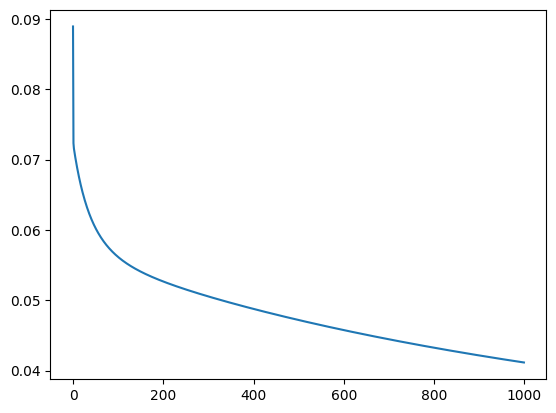

In [9]:
plt.plot(losses)

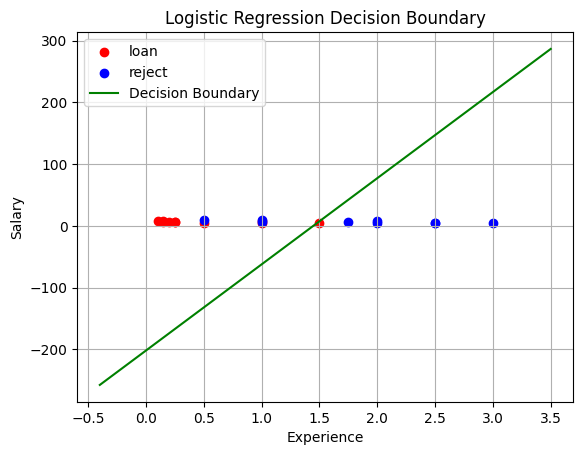

In [20]:
x = data[0]
y = data[1]
plot_decision_boundary(x, y, w0, w1, w2)